# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [31]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [32]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
        Cluster_Distance = np.zeros((len(Data_points), len(Cluster_Centroids))) #initialize the 2d array with correct dimensions
        if Distance_Type == 'Euclidean':
            Cluster_Distance = np.linalg.norm(Data_points[:, np.newaxis, :] - Cluster_Centroids, axis=2)
        elif Distance_Type == 'Pearson':
            Coeff = np.zeros((Data_points.shape[0], Cluster_Centroids.shape[0]))
            for i,point in enumerate(Data_points): #Keeping track of index and value for both data and centroids
                for j,centroid in enumerate(Cluster_Centroids):
                    Cluster_Distance[i, j], _ = pearsonr(point, centroid) #No need for P_value
            Cluster_Distance = 1 - Cluster_Distance        
        else:
            return "Please Enter a Valid Distance Type"
        return Cluster_Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [33]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    #Generating the Centroids randomly to the number of clusters
    initial = np.random.choice(Data_points.shape[0], Number_of_Clusters, replace=False)
    #initializing Cluster centroids with indexes of the centroids
    Cluster_Centroids = Data_points[initial]
    #Stopping condition array when the centroids dont change 
    old = np.zeros((Number_of_Clusters, Data_points.shape[1]))
    while not (np.array_equal(Cluster_Centroids, old)):
        distance =GUC_Distance(Cluster_Centroids,Data_points,Distance_Type)
    #Getting the smallest distance centroid's index for each point  
        Smallest_Centroid= np.argmin(distance, axis=1)
    #MeanSquare using formula
        Mean_Indexes = np.diagonal(distance.T[Smallest_Centroid])
        Cluster_Metric = np.sum(np.square(Mean_Indexes))/len(Data_points)
    #Update the Centroids by using a boolean flag and making it true based on the shortest distance between each centroid then dot product with data
        Cluster_Assignment = (Smallest_Centroid[:, None] == np.arange(Number_of_Clusters))
        Dot = np.dot(Cluster_Assignment.T,Data_points) #Transpose is to align the dimensions correctly for dot product
        Sum = np.sum(Cluster_Assignment,axis=0) #Sum of true for each cluster
    #getting the mean
        Mean = Mean.astype(float)
        Mean = Mean / Sum[:, None] #Dividing by the number of true to get mean for each cluster
    #Making the stopping condition
        old = Cluster_Centroids
        Cluster_Centroids = Mean  
    #It will only stop if the Mean doesnt change for 2 iterations
    return [Cluster_Assignment, distance,Cluster_Metric] 

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [34]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

> #### 2.1. helper Display function 

In [35]:
def display_cluster(X,Cluster_Centroids,Smallest_Centroid,num_clusters):
    color = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#17becf',  # Cyan
    '#bcbd22'   # Lime
    ]
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[Smallest_Centroid==i,0],X[Smallest_Centroid==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(Cluster_Centroids[i][0],Cluster_Centroids[i][1],c = color[i], marker = 'x', s = 100)
def display_cluster_updated(X, Cluster_Centroids, Smallest_Centroid, column_labels, num_clusters):
    color = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#17becf',  # Cyan
    '#bcbd22'   # Lime
    ]
    alpha = 0.5  #color obaque
    s = 20
    dimension = X.shape[1]
    if dimension < 3:
        print("dimension has to be atleast 3")
        return
    if num_clusters == 0:
        figure = plt.figure()
        ax = figure.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color[0], alpha=alpha, s=s)
        ax.set_xlabel(column_labels[0])
        ax.set_ylabel(column_labels[1])
        ax.set_zlabel(column_labels[2])
        ax.set_title("Data Points")
    else:
        figure = plt.figure()
        plots = dimension // 3
        print("plots", plots)
        for plot_index in range(plots):
            ax = figure.add_subplot(1,plots, plot_index + 1, projection='3d')
            for i in range(num_clusters):
                slice = slice(plot_index * 3, (plot_index + 1) * 3)
                sliced_data = X[Smallest_Centroid == i][:, slice]
                ax.scatter(sliced_data[:, 0], sliced_data[:, 1], sliced_data[:, 2],
                c=color[i], alpha=alpha, s=s)
                cluster_centroid_slice = Cluster_Centroids[i][slice]
                ax.scatter(cluster_centroid_slice[0], cluster_centroid_slice[1], cluster_centroid_slice[2],
                   c=color[i], marker='x', s=100)
            ax.set_xlabel(column_labels[plot_index*3], fontsize=10.5)
            ax.set_ylabel(column_labels[plot_index*3 + 1], fontsize=10.5)
            ax.set_zlabel(column_labels[plot_index*3 + 2], fontsize=10.5)

            ax.tick_params(axis='both', which='major', labelsize=10.5)
            
    figure.suptitle(f"Number of Clusters {num_clusters}")
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9, wspace=0.3, hspace=0.3)
    plt.tight_layout()
    plt.show()
#Elbow curve function
def elbow():
    inertia_values = []
    Data_points = pd.read_csv('Customer data.csv', skiprows=1, header=None) #Loading Data from CSV
    Data_points = Data_points.iloc[:, 1:].values #Skipping the first column
    max_clusters = 50  # Determine the range of clusters to try
    #Apply K-means clustering for each number of clusters and store inertia
    for num_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(Data_points)
        inertia_values.append(kmeans.inertia_)
        #Plot the elbow curve
        plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
        plt.title('Elbow Method for Optimal Number of Clusters')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia (Within-cluster sum of squares)')
        plt.figure()

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

In [36]:

# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X,[],0)

TypeError: display_cluster() missing 1 required positional argument: 'num_clusters'

> #### 2.3. Example 2 : Multi blob Data Gen and display 

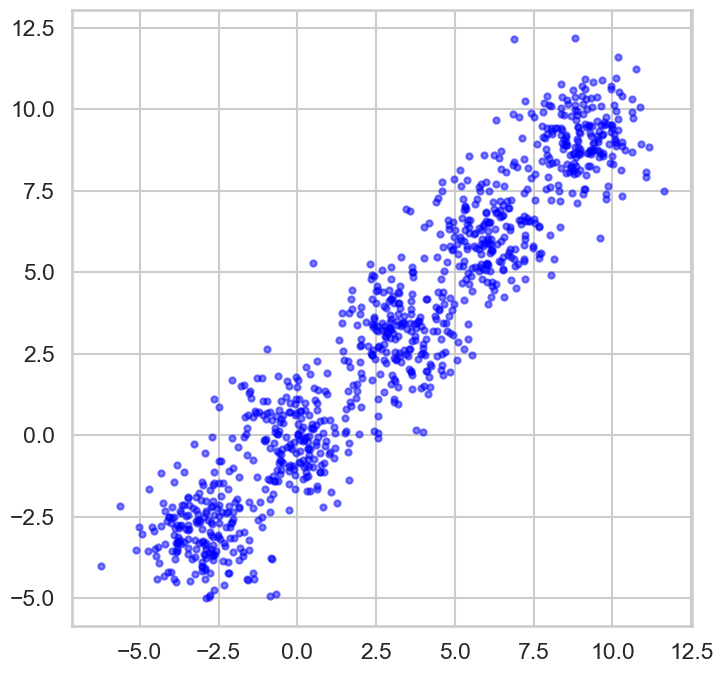

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X,[],0)

#### 2.3. Example 3 : moons Data Gen and display 

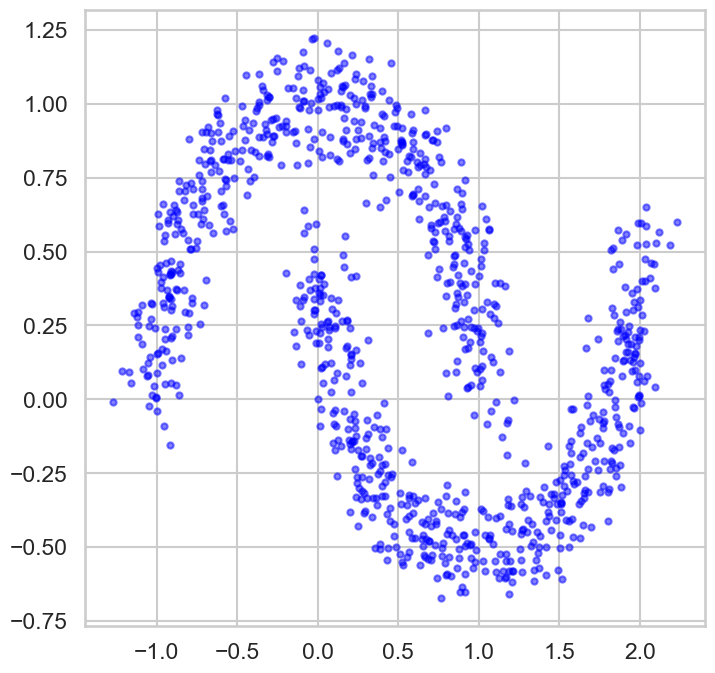

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X,[],0)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
sns.set_style("whitegrid")
sns.set_context("talk")
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"euclidean")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
elbow()

NameError: name 'GUC_Kmean' is not defined

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 